<a href="https://colab.research.google.com/github/duvancatan/Time_Series_UdeA/blob/main/1_Tendencia_Suavizacion_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Método de Descomposición

El método de descomposición en series de tiempo, es una técnica analítica utilizada para entender la estructura y los patrones presentes en una serie temporal. Una serie temporal es una secuencia de datos recopilados o registrados en intervalos de tiempo sucesivos. La descomposición de series temporales ayuda a separar la serie en componentes fundamentales, lo que facilita el análisis y la comprensión de las tendencias, estacionalidades y patrones cíclicos presentes en los datos.

La descomposición de series temporales generalmente se realiza mediante un enfoque aditivo o multiplicativo:

Descomposición Aditiva:

Tendencia (T): Representa la dirección general de los datos a lo largo del tiempo, identificando si la serie muestra una tendencia creciente o decreciente.
Estacionalidad (S): Refleja patrones estacionales o cíclicos que se repiten a intervalos fijos de tiempo, como estacionalidades mensuales o anuales.
Residuo (R): Es la parte restante de la serie que no puede explicarse mediante la tendencia y la estacionalidad. Incluye variaciones aleatorias o errores.
La serie temporal original (O) se puede expresar como la suma de estos componentes: X(t) = T(t) + S(t) + R(t).

Descomposición Multiplicativa:

En lugar de sumar los componentes, se multiplican. La serie temporal original se expresa como: X(t) = T(t) * S(t) * R(t).



# Análisis con **R - Project**

In [1]:
# Instalar Librerías #
install.packages("astsa")
install.packages("stats")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘stats’ is a base package, and should not be updated”


In [2]:
# Cargar Librerías #
library(astsa)
library(stats)

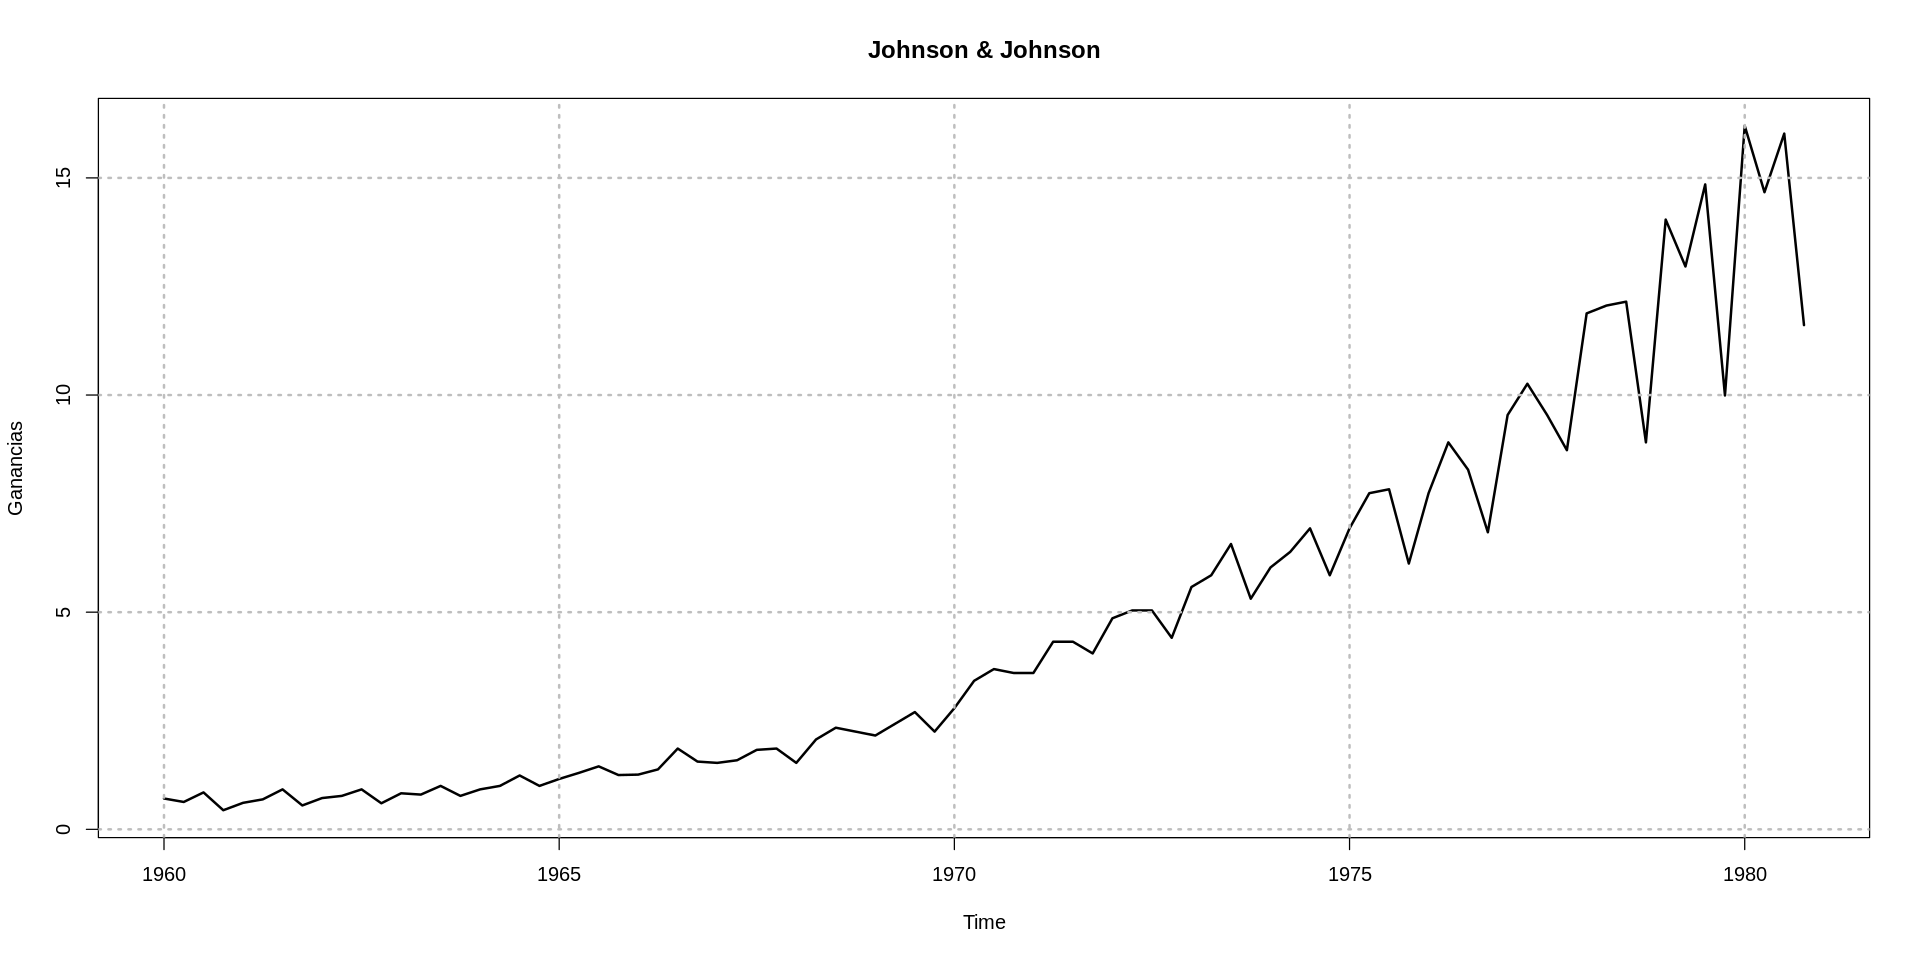

In [9]:
# Gráfica de la Serie de la ganancias trimestrales de Johnson & Johnson #
# Ajustar el tamaño del gráfico (más ancho)
options(repr.plot.width=16, repr.plot.height=8)
plot.ts(jj, main="Johnson & Johnson", ylab="Ganancias", lwd = 2); grid(lwd = 2, col = "gray")

In [ ]:
# Descomposición Aditiva #
desc_adit <- decompose(jj, type="additive")
plot(desc_adit)

In [ ]:
# Descomposición Multiplicativa #
desc_mult <- decompose(jj, type="multiplicative")
plot(desc_mult)

# 2. Regresión Lineal en Series de Tiempo

La regresión lineal para series de tiempo es un método que busca modelar la relación lineal entre una variable dependiente y el tiempo. Utiliza datos históricos para encontrar una línea de mejor ajuste que represente la tendencia a lo largo del tiempo. Este modelo lineal permite prever futuros valores basados en la relación identificada. Sin embargo, la regresión lineal asume que la relación entre la variable y el tiempo es constante, lo que puede ser limitante para capturar patrones más complejos en series temporales. Otros métodos, como modelos autoregresivos o de suavizado exponencial, son a menudo preferidos para abordar la dinámica temporal más efectivamente.

In [ ]:
# Instalar Librerías #
install.packages("astsa")

In [ ]:
# Cargar Librerías #
library(astsa)

In [ ]:
# Cargar datos de Johnson & Johnson #
ts.plot(jj, ylab="Quarterly Earnings per Share")

In [ ]:
# Definici ́on de los Tiempos #
t = as.vector(time(jj)); t2 <- t^2

In [ ]:
# Modelo Lineal names(mod.lin) con resumen #
mod.lin = lm(jj~t);
summary(mod.lin)

In [ ]:
# Modelo Cuadratico #
mod.cuad = lm(jj~t+t2);
summary(mod.cuad)

In [ ]:
# Modelo Log-Lineal #
mod.log.lin = lm(log(jj)~t); summary(mod.log.lin)

In [ ]:
# Modelo Exponencial #
Ds = data.frame(jj,t)
beta0 = mod.log.lin$coefficient[1]
beta1 = mod.log.lin$coefficient[2]
mod.exp = nls(jj~exp(beta0+beta1*t),data=Ds,
start=list(beta0=beta0, beta1=beta1)); summary(mod.exp)

In [ ]:
# Gr ́afica de la serie con Tendencias Estimadas #
ts.plot(jj, type="o", ylab="Quarterly Earnings per Share", ylim=c(-2,17),
lwd=2, main="Johnson & Johnson");grid(col = "black")

# Modelo Lineal #
abline(mod.lin, col="red", lwd=2)

# Modelo Cuadrático #
lines(t, as.numeric(mod.cuad$coefficients[1]) +
as.numeric(mod.cuad$coefficients[2])*t +
as.numeric(mod.cuad$coefficients[3])*t2, col="blue", lwd=2)

# Coeficientes iniciales para Mod Exp #
lines(t, exp(mod.log.lin$coefficient[1]+
mod.log.lin$coefficient[2]*t), col="green", lwd=2)

# Coeficientes iterados para Mod Exp #
lines(t, exp(summary(mod.exp)$coefficients[1]+
summary(mod.exp)$coefficients[2]*t), col="yellow", lwd=2)
legend("topleft", legend=c("Lineal", "Cuadrático", "Exponencial", "Exponencial Iterado"), col=c("red","blue","green", "yellow"), pch = "_", lwd=2)

In [ ]:
# Criterios de Informaci ́on AIC y BIC #
AIC.tot = c(AIC(mod.lin),
            AIC(mod.cuad),
            AIC(mod.exp))
BIC.tot = c(AIC(mod.lin,k=log(length(jj))),
            AIC(mod.cuad,k=log(length(jj))),
            AIC(mod.exp,k=log(length(jj))))

In [ ]:
# Comparaci ́on de valores de AIC y BIC para cada modelo #
medidas = rbind(AIC.tot, BIC.tot)
colnames(medidas) = c("lin","cuad","exp_ite")
rownames(medidas) = c("AIC","BIC")
(medidas)

In [ ]:
# Chequeo de Residuales #
r2 = mod.cuad$residuals
par(mfrow=c(2,2))
qqnorm(r2)
qqline(r2, col="red")
hist(r2,40)
acf(r2, lag.max = 25)
pacf(r2, lag.max = 25)

In [ ]:
# Pronósticos #
pr2 = predict(mod.cuad,data.frame(
t=seq(1978,1980.75,0.25),
t2=seq(1978,1980.75,0.25)^2))
tt=seq(1978,1980.75,0.25)
plot(tt,jj[73:84],type="b")
lines(tt,pr2,col="red")

In [ ]:
# Errores de Pronósticos #
h<-1:12
Xt<-jj[73:84]
hatXt<-pr2
hatet<-Xt-hatXt
(tabla<-data.frame(h,Xt,hatXt,hatet))

In [ ]:
# Instalando Librería #
install.packages("MLmetrics")

In [ ]:
# Midiendo la Capacidad de Pron ́ostico MAPE #
library(MLmetrics)
print(paste("MAPE =", MAPE(hatXt, Xt)*100, "%"))

# Media Móvil (Filtros)
La media móvil para series de tiempo es un método que calcula el promedio de un conjunto de observaciones sucesivas a lo largo del tiempo. Consiste en tomar un número fijo de puntos de datos (la ventana de la media móvil) y calcular el promedio en cada paso, desplazando la ventana a medida que avanzan los datos. Esto suaviza la serie temporal, eliminando el ruido aleatorio y resaltando las tendencias subyacentes. La elección del tamaño de la ventana afecta la sensibilidad del método: una ventana más grande suaviza la serie más agresivamente, mientras que una ventana más pequeña captura variaciones más rápidas. La media móvil es una técnica simple pero útil para identificar patrones y tendencias en los datos temporales.

In [ ]:
# Instalar Librerías #
install.packages("fTrading")

In [ ]:
# Cargar Librería #
library(fTrading)

In [ ]:
# Conjunto de Datos de MSFT #
data(MSFT)

In [ ]:
# Gr ́aficos Simult ́aneos
plot(MSFT[, 1:4], type = "l", main="Precios Acciones Microsoft")

In [ ]:
# Carga precio de cierre de Microsoft #
x = MSFT[, 4]

In [ ]:
# Ancho de ventana #
m = 13

In [ ]:
# Suavizamiento #
z = filter(x, rep(1/(m+1),m+1), "conv",1 ,T , NULL)

In [ ]:
# Serie Original y Suavizada #
plot(x, main="Media Móvil - Close Microsoft");grid()
lines(z, col="blue")

# Suavización Exponencial Simple (SES)
Pondera todos los datos pasados con ponderaciones que disminuyen exponencialmente al ir hacia el pasado. Es decir, normalmente los datos más reciente tienen una mayor ponderaci ́on. La ponderación de esta forma supera en gran medida las limitaciones de promedios m ́oviles o m ́etodos de cambio de porcentaje.
Este método, cuyo resultado es una previsión plana, recta, es el mejor para datos volátiles sin tendencia ni estacionalidad.
La constante funciona como un factor de ponderación y su variación se hace de acuerdo a nuestra necesidad de darle más peso a datos recientes (α más elevado) o a datos pasados (α más bajo). Si α = 1, nuestro pronóstico del próximo periodo será exactamente igual al del periodo actual.

## Suavización Descriptiva

In [ ]:
# Instalar Librerías #
install.packages("fTrading")

In [ ]:
# Cargar Librería #
library(fTrading)

In [ ]:
# Conjunto de Datos de MSFT #
data(MSFT)

In [ ]:
# Gra ́ficos Simultáneos #
plot(MSFT[, 1:4], type = "l", main="Precios Microsoft")

In [ ]:
# Carga precio de cierre de Microsoft #
x = MSFT[, 4]

In [ ]:
# Definición del parámetro de suavización #
alfa=0.29

In [ ]:
# Serie suavizada #
y = emaTA(MSFT[, 4], lambda = alfa)

In [ ]:
# Gráficas de la series original y suavizada #
plot(x, type = "l", main="Suavización Exponencial - Close Microsoft");grid()
lines(y, col="red")

## Suavización con Pronóstico

In [ ]:
# Instalar Librerías #
install.packages("fpp2")
install.packages("forecast")
install.packages("ggplot2")

In [ ]:
# Cargar Librerías #
library(fpp2)
library(forecast)
library(ggplot2)

In [ ]:
# Conjunto de Datos de MSFT #
data(MSFT)

In [ ]:
# Grá́ficos Simultáneos #
plot(MSFT[, 1:4], type = "l", main="Precios Microsoft")

In [ ]:
# Carga precio de cierre de Microsoft #
close = MSFT[, 4]#, start=1, frequency=1)

In [ ]:
# Gráfica de la serie #
plot(close, main="Precios de Cierre Microsoft")

In [ ]:
# Ajuste con Suavización Exponencial #
fit_close<-ses(close, h=5, initial = "simple", alpha = 0.3)

In [ ]:
# Valores de los Pronósticos #
fit_close

In [ ]:
# Resumen del modelo y desempeño #
summary(fit_close)

In [ ]:
# Gráfico de la serie y pronóstico #
plot(fit_close, main="Pron ́osticos de Precios de Cierre Microsoft")

# Suavización Holt-Winters
El método de Holt-Winters es una técnica de suavizado exponencial triple utilizada para modelar y predecir series de tiempo con patrones de tendencia y estacionalidad. Este enfoque toma en cuenta tres componentes principales: nivel, tendencia y estacionalidad. Utiliza algoritmos de suavizado exponencial para actualizar y pronosticar estos componentes en cada paso de tiempo. El método de Holt-Winters es útil para series temporales que exhiben tanto tendencias de crecimiento o declive como patrones estacionales regulares. Ayuda a capturar y prever estos patrones de manera más precisa que los métodos de suavizado exponencial simple o doble.

In [ ]:
# Instalar Librerías #
install.packages("forecast")
install.packages("astsa")
install.packages("stats")

In [ ]:
# Cargar librerías #
library(forecast)
library(astsa)
library(stats)

In [ ]:
# Cargar datos de Johnson & Johnson #
ts.plot(jj, ylab="Quarterly Earnings per Share", main="Ganancias Trimestrales", lwd=2); grid(col = "black")

In [ ]:
# Ajuste del modelo aditivo #
mod_hw = HoltWinters(jj, seasonal = "additive")
plot(mod_hw, lwd=2); grid(col = "black")

In [ ]:
# Descomposición #
plot(fitted(mod_hw), main="Descomposición Holt-Winters", lwd=2); grid(col = "black")

In [ ]:
# Predicción #
pred_hw = predict(mod_hw, 4, prediction.interval = TRUE)
pred_hw

In [ ]:
# Graficar Serie con Predicción #
plot(mod_hw, pred_hw, main= "Pronóstico de Ganancias", lwd=2); grid(col = "gray")